Ingrese la cantidad maxima de numeros a generar: 50
Ingrese el valor de la semilla x0: 3
Ingrese el valor de a: 5
Ingrese el valor de c: 7
Ingrese el valor del modulo: 200


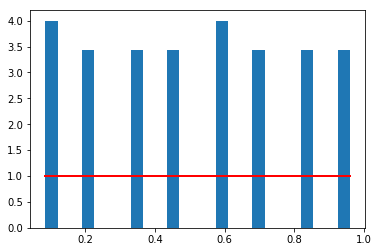

De =  0.2419980601357909


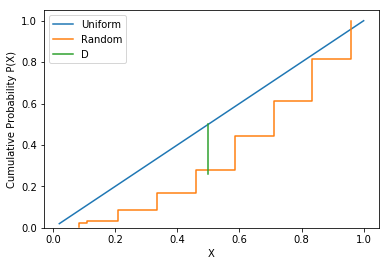

D =  0.24199806013579078
p-value =  0.004612992072794467


In [11]:
# Prueba de Kolmogorov-Smirnov
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def mids(n,lista):
    x=float(input("Ingrese el valor de la semilla x0:\n "));
    x0=x;
    i=0;
    #print("\nLos numeros generados son: "); 
    while i < n:
        x=x*x;
        pu=(x//100)%10000;
        x=pu;
        u=round((pu/10000),5);
        lista.append(u);
        #print(u);
        i=i+1;

def mtcar(n,lista):
    
    x=float(input("Ingrese el valor de la semilla x0: "));
    
    a=float(input("Ingrese el valor de a: "));
    c=float(input("Ingrese el valor de c: "));
    m=float(input("Ingrese el valor del modulo: "));
    i=0;
    #print("\nLos numeros generados son: "); 
    while i < n:
    
        x=((a*x)+c)%m;
        u=x/m;           
        lista.append(u);
        #print(u);
        i=i+1;
    

N = int(input("Ingrese la cantidad maxima de numeros a generar: "));
u = [1.0] * N;
x=[];
#mids(N,x);
mtcar(N,x);


count, bins, ignored = plt.hist(x, 25, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()


x1 = np.arange(1/N,1+1/N,1/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(x)
y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

De=np.absolute(y2-y1)
print("De = ",np.max(De))

plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')
plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.ylim(0, 1.05)
plt.show()
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print("D = ", D)
print("p-value = ", pvalue)

In [3]:
#prueba de chi-cuadado x^2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy.stats as stats



def mtcar(n,secuencia=[]):
    
    x=float(input("Ingrese el valor de la semilla x0: "));
    
    a=float(input("Ingrese el valor de a: "));
    c=float(input("Ingrese el valor de c: "));
    m=float(eval(input("Ingrese el valor del modulo: ")));
    i=0;
    #print("\nLos numeros generados son: "); 
    while i < n:
    
        x=((a*x)+c)%m;
        u=x/m;           
        secuencia.append(u);
        #print(u);
        i=i+1;
        
    #print("secuencia:",secuencia);
    #print(canpart)
def pruebaChi(canpart,secuencia=[]):    
    longitudIntervalo = 1 / float(canpart) 
    frecuenciasObservadas = []           


    for i in range(0,canpart):
        frecuenciasObservadas.append(0)
        
    

   
    
    for i in range(len(secuencia)):
        cont = 1
        for j in range(0,canpart):     
            if secuencia[i] > (cont - 1) * longitudIntervalo and secuencia[i] <= cont * longitudIntervalo:
                frecuenciasObservadas[j] += 1
            cont += 1 
            
    #print("las frecuencias observadas:\n",frecuenciasObservadas)
        
    frecuenciaEsperada = len(secuencia) / float(canpart)
    chiCuadrado = 0.0
        
    for i in range(0,canpart):
        chiCuadrado += (frecuenciasObservadas[i] - frecuenciaEsperada)**2 / frecuenciaEsperada
    #print("valor final: ")
    
    print ("Prueba del simulador",chiCuadrado)
    
    crit = stats.chi2.ppf(q = 0.95,df = canpart)
    crit=round(crit,4)
    print("Con 95%=",crit)

    if(chiCuadrado<crit):
        print("Aceptada la hipotesis de uniformidad chi-cuadrado")
    
    else:
        print("Rechazada la hipotesis de uniformidad chi-cuadrado")

    
    

k = int(input("Introduzca el valor de k: ")) 
x = []
N = int(input("Ingrese la cantidad maxima de numeros a generar: "));

chi=mtcar(N,x)
pruebaChi(k,x)
y=np.random.rand(N)
print("Para el generador numpy:")
pruebaChi(k,y)

Introduzca el valor de k: 11
Ingrese la cantidad maxima de numeros a generar: 50
Ingrese el valor de la semilla x0: 5
Ingrese el valor de a: 65539
Ingrese el valor de c: 0
Ingrese el valor del modulo: 2**31
Prueba del simulador 9.399999999999999
Con 95%= 19.6751
Aceptada la hipotesis de uniformidad chi-cuadrado
PAra el generador numpy
Prueba del simulador 4.559999999999999
Con 95%= 19.6751
Aceptada la hipotesis de uniformidad chi-cuadrado


In [2]:
## test de rachas

import numpy as np
import matplotlib.pyplot as plt
import math

def mtc (n): 
    x=float(input("Ingrese el valor de la semilla x0: "));
    a=float(input("Ingrese el valor de a: "));
    c=float(input("Ingrese el valor de c: "));
    m=float(eval(input("Ingrese el valor del modulo: ")));
    i=0;
    secuencia=[]
    #print("\nLos numeros generados son: "); 
    while i < n:
    
        x=((a*x)+c)%m;
        u=x/m;           
        secuencia.append(u);
        #print(u);
        i=i+1;
    return secuencia

def Rachas(N,secuencia=[]):
    tRacha=[]
    for i in range(len(secuencia)-1):
        if secuencia[i] > secuencia[i+1]:
            tRacha.append(0)
        elif secuencia[i] < secuencia[i+1]:
            tRacha.append(1)
    R=0
    for i in range(len(tRacha)-1):
        if tRacha[i]!=tRacha[i+1]: 
            R+=1
    #print ("Las rachas son: ")
    #print (R)
    
    Z = (R - (2*N-1)/float(3))/math.sqrt((16*N-29)/float(90))
    #print("Z=",Z)
    print ("|Z|= ")
    print (np.absolute(Z),"\n")
    z=np.absolute(Z)
    if(z<1.960):
        print("Aceptada la prueba de rachas\n")
    else:
        print("Rechazada la prueba de rachas\n")
    

def main ():
    n=int(input("Ingrese la cantidad maxima de numeros a generar: "));
    secuencia = []
    secuencia=mtc(n)
    Rachas(n,secuencia=[])
    
    y=np.random.rand(n)
    print("Para el generador numpy:")
    Rachas(n,y)
    

if __name__ == "__main__":
    main()  


Ingrese la cantidad maxima de numeros a generar: 50
Ingrese el valor de la semilla x0: 5
Ingrese el valor de a: 65539
Ingrese el valor de c: 0
Ingrese el valor del modulo: 2**31
Z= -11.27477816048251
|Z|= 
11.27477816048251 

Rechazada la prueba de rachas

Para el generador numpy:
Z= 0.0
|Z|= 
0.0 

Aceptada la prueba de rachas

